# Natural Language Processing(NLP)

## Regular Expression (RegEx)

### Important RegEx Function to note:
* match: finds the first occurence of pattern in the string
* search: locates the pattern in the string
* findall: find all occurences of pattern in the string
* sub: search and replace
* split: split the text by the given regular expression pattern

In [76]:
# import the RegEx library
import re

In [5]:
# Using the match() function
string = "tiger is the national animal of india"
pattern = "tiger"
pattern2 = "lion"

mo = re.match(pattern2, string)
print(mo)

None


The above match function above checked in the first word in the string matches the pattern

In [8]:
# Using the search() function
string = "tiger is the national animal of india"
pattern = "national"

mo2 = re.search(pattern, string)
print(mo2.group(0))

national


In [10]:
# Using the findall() function
string = "tiger is the national animal of india and national sports in hockey"
pattern = "national"


mo3 = re.findall(pattern, string)
print(mo3)

['national']


In [14]:
# Using the finfiter() function
# This creates an iterator the can be called out in a loop
#It returns the indexes of the words searched
#the .start() method returns just the values
mo4 = re.finditer(pattern, string)
for m in mo4:
    print(m.start())

13


In [16]:
# Extracting date from a string
string = "Ron was born on 12-09-1992 and he was admitted to school on 15-12-1999"
pattern = "\d{2}-\d{2}-\d{4}"

mo5 = re.findall(pattern, string)
print(mo5)

['12-09-1992', '15-12-1999']


In [24]:
# Replacing a pattern in a string

print(re.sub(pattern, "Monday", string))

Ron was born on Monday and he was admitted to school on Monday


In [25]:
!pip install wordcloud

## Exploring Text Data

In [26]:
# Importing important Libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud #create a wordcloud of text

In [40]:
# read csv file
tweets =  pd.read_csv(r'C:\Users\hp\Documents\PYTHON\Tensorflow NLP\Dataset\tweets.csv', encoding = 'ISO-8859-1', index_col=False)
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


### Generate Word Frequency

We will focus on the text column of the dataset.


We want to generate how often a particular word appears in the series of texts

In [64]:
#split the text into individual word
twtxt = tweets.text.str.split()
for wd in twtxt:
    print(wd)

e', 'your', 'Englis']
['@raj11117', '@logical2indian', '@rkbaylan', '@sharadsharma1', '6)', 'nw', 'since', 'that', 'idea', 'failed', 'bcoz', 'of', 'demonetization,', 'booth', 'capturing', 'is', 'd', 'nw', 'idea']
['@raj11117', '@logical2indian', '@rkbaylan', '@sharadsharma1', '4)', 'demonetization', 'b4', 'Punjab', 'election', 'n', 'asking', '4', 'a', 'roll', 'back.']
['@TOIIndiaNews', 'This', 'is', 'what', 'called', 'development.Neither', 'demonetization', 'nor', 'digitalization', 'bring', 'anything', 'better', 'than', 'https://t.co/mBtHqklB5c']
['A', 'number', 'which', 'as', 'you', 'are', 'not', "Kohli's", 'scores', 'but', 'the', 'Demonetization', 'tableau.']
['RT', '@rahulroushan:', 'Prohibition', 'is', 'Demonetization', '2.0:', 'You', 'kept', 'quiet', 'when', 'poor', "men's", 'tobacco-gutkha', 'was', 'banned,', 'now', "they'll", 'love', 'your', 'Englis']
['RT', '@MarkDice:', 'The', 'ads', 'appearing', 'on', 'offensive', 'YouTube', 'videos', 'that', 'slip', 'by', 'the', 'demonetizat

In [63]:
# How the product of our defined function would look like
empty_list = []
empty_list.extend(twtxt)
empty_list[:10]

[['RT',
  '@rssurjewala:',
  'Critical',
  'question:',
  'Was',
  'PayTM',
  'informed',
  'about',
  '#Demonetization',
  'edict',
  'by',
  'PM?',
  "It's",
  'clearly',
  'fishy',
  'and',
  'requires',
  'full',
  'disclosure',
  '&amp;'],
 ['RT',
  '@Hemant_80:',
  'Did',
  'you',
  'vote',
  'on',
  '#Demonetization',
  'on',
  'Modi',
  'survey',
  'app?'],
 ['RT',
  '@roshankar:',
  'Former',
  'FinSec,',
  'RBI',
  'Dy',
  'Governor,',
  'CBDT',
  'Chair',
  '+',
  'Harvard',
  'Professor',
  'lambaste',
  '#Demonetization.',
  'If',
  'not',
  'for',
  'Aam',
  'Aadmi,',
  'listen',
  'to',
  'th'],
 ['RT',
  '@ANI_news:',
  'Gurugram',
  '(Haryana):',
  'Post',
  'office',
  'employees',
  'provide',
  'cash',
  'exchange',
  'to',
  'patients',
  'in',
  'hospitals',
  '#demonetization',
  'https://t.co/uGMxUP9'],
 ['RT',
  '@satishacharya:',
  'Reddy',
  'Wedding!',
  '@mail_today',
  'cartoon',
  '#demonetization',
  '#ReddyWedding',
  'https://t.co/u7gLNrq31F'],
 ['@Der

In [51]:
# Define a function to generate Word Frequency

def gen_freq(text):
    list_of_word = []
    
    for word in text.split():
        list_of_word.extend(word)

    word_freq = pd.Series(list_of_word).value_counts()

    word_freq[:30]
    return word_freq

In [65]:
words_freq = gen_freq(tweets.text.str)
words_freq

RT                11053
to                 7650
is                 5152
in                 4491
the                4331
                  ...  
Crs                   1
Play                  1
@jethapunjabi:        1
#CAG                  1
#bankingwoes          1
Length: 19601, dtype: int64

### EDA using Word Clouds

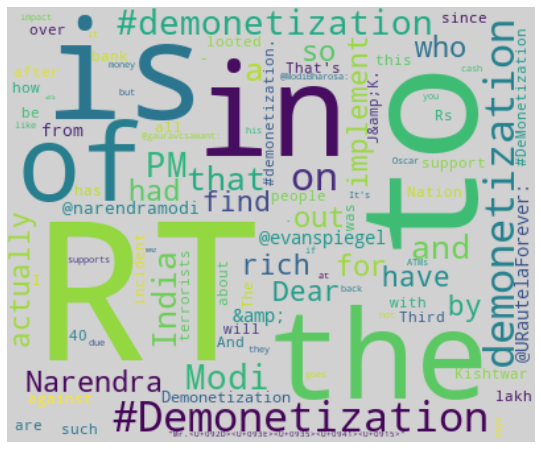

In [75]:
WCloud = WordCloud(width=400, height=330, max_words=100, background_color='#D1D1D1').generate_from_frequencies(words_freq)

plt.figure(figsize=(12, 8))
plt.imshow(WCloud, interpolation='bilinear', cmap='rainbow')
plt.axis('off')
plt.show()

Note these issues:

1. Words like and, from, such and the likes are constructs of Rnglish language and they aren't specific to a particular tweet. These words re known as Stopwords.

2. Some words are just noises so should be removed.

3. Demonetization and demonetization were read as two different words because the texts have not been nomalized

### Text Cleaning

In [79]:
#Solution to issue 2
# RegEx will be used here
#Cleaning text by replacing or completely removing
def clean_txt(text):
    text = re.sub(r'RT', '', text) # replace RT with nothing in text

    text = re.sub(r'&amp', '&', text)

    text = re.sub(r'[!?:;#@.,-]', '', text) # remove punctuations

    # converting all texts to lowercase
    text = text.lower()
    return text

In [80]:
# Remove stop words
from wordcloud import STOPWORDS

print(STOPWORDS)

{"you're", "that's", 'having', 'himself', 'here', 'be', 'i', 'should', 'before', 'get', 'your', 'from', "we'll", "haven't", 'her', 'against', 'do', "she'll", "mustn't", 'was', 'nor', 'on', 'therefore', 'to', 'hers', 'k', "isn't", 'a', 'then', 'because', 'him', 'through', 'few', 'r', 'themselves', "they're", 'for', 'as', 'yours', 'com', "aren't", "doesn't", "it's", 'at', 'not', 'myself', 'when', "how's", 'yourselves', 'but', 'up', "she'd", "wasn't", "why's", 'were', 'been', "you'll", 'more', 'about', 'off', 'just', 'own', 'out', 'so', 'would', 'each', 'since', 'cannot', "hasn't", 'after', 'whom', 'with', 'those', 'otherwise', 'www', "who's", "won't", 'during', "we'd", 'yourself', 'above', "hadn't", 'how', 'they', 'while', "you've", 'does', 'some', "where's", "weren't", 'else', 'being', 'into', 'is', "we've", 'no', "they'd", 'most', "shouldn't", 'http', 'ours', 'can', 'there', "shan't", 'are', "let's", 'all', 'could', 'these', "they'll", 'she', 'their', 'the', 'any', 'in', "didn't", 'the

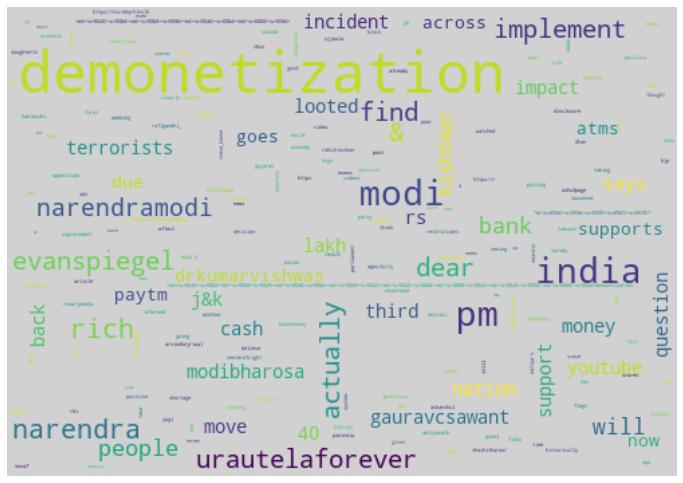

In [86]:
texts = tweets.text.apply(lambda x: clean_txt(x))
words_freq = gen_freq(texts.str)*100
words_freq = words_freq.drop(labels=STOPWORDS, errors='ignore')

# Generate word cloud
WCloud = WordCloud(width=500, height=350, max_words=200, background_color='#D1D1D1').generate_from_frequencies(words_freq)

plt.figure(figsize=(12,14))
plt.imshow(WCloud, interpolation='bilinear', cmap='rainbow')
plt.axis('off')
plt.show()

The most used word in twwets is *DEMONETIZATION*. 

The words that appear big can be used to decipher what topic that people tweeted on the most. 